In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mat
import sklearn as skl

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

print("pandas version - ", pd.__version__)
print("numpy version - ", np.__version__)
print("matplotlib version - ", mat.__version__)
print("seaborn version - ", sns.__version__)
print("sklearn version - ", skl.__version__)

pandas version -  1.2.4
numpy version -  1.20.1
matplotlib version -  3.3.4
seaborn version -  0.11.1
sklearn version -  0.24.1


In [64]:
df = pd.read_csv('Mall_Customers.csv')
# df = df.set_index('CustomerID')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,NaN,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  183 non-null    object 
 2   Age                     190 non-null    float64
 3   Annual Income (k$)      186 non-null    float64
 4   Spending Score (1-100)  187 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [66]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,190.000000,186.000000,187.000000
mean,100.500000,38.994737,61.462366,50.016043
std,57.879185,14.063160,26.139153,26.457407
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,43.000000,32.000000
50%,100.500000,36.000000,62.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [67]:
df.isnull().sum()

CustomerID                 0
Gender                    17
Age                       10
Annual Income (k$)        14
Spending Score (1-100)    13
dtype: int64

In [68]:
df.drop('CustomerID', axis=1, inplace=True)

# Exploratory Data Analysis

<AxesSubplot:>

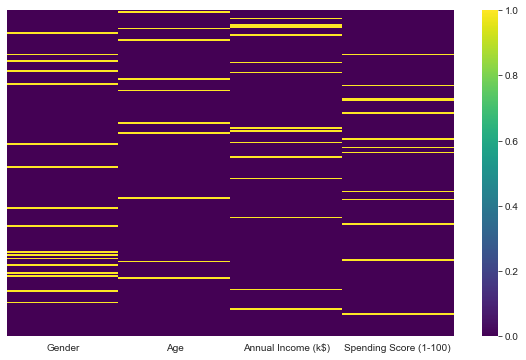

In [69]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [70]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

ann_reshape = np.reshape(df['Age'].values, (-1, 10))

mean_imputer = mean_imputer.fit(ann_reshape)

df['Age'] = mean_imputer.transform(ann_reshape).reshape(-1, 1)
df['Age'].isnull().sum()

0

In [71]:
median_imputer = SimpleImputer(strategy='median', missing_values=np.nan)

age_reshape = np.reshape(df['Annual Income (k$)'].values, (-1, 10))

median_imputer = median_imputer.fit(age_reshape)

df['Annual Income (k$)'] = median_imputer.transform(age_reshape).reshape(-1, 1)
df['Annual Income (k$)'].isnull().sum()

0

In [72]:
score_reshape = np.reshape(df['Spending Score (1-100)'].values, (-1, 10))
mean_imputer = mean_imputer.fit(score_reshape)
df['Spending Score (1-100)'] = mean_imputer.transform(score_reshape).reshape(-1, 1)

In [73]:
score_reshape = np.reshape(df['Spending Score (1-100)'].values, (-1, 10))
score_reshape

array([[39.        , 81.        ,  6.        , 77.        , 40.        ,
        76.        ,  6.        , 94.        ,  3.        , 72.        ],
       [14.        , 99.        , 15.        , 77.        , 13.        ,
        79.        , 35.        , 66.        , 29.        , 98.        ],
       [35.        , 73.        ,  5.        , 73.        , 14.        ,
        82.        , 32.        , 66.83333333, 31.        , 87.        ],
       [ 4.        , 73.        ,  4.        , 92.        , 14.        ,
        81.        , 17.        , 73.        , 26.        , 75.        ],
       [35.        , 92.        , 36.        , 61.        , 28.        ,
        65.        , 31.76470588, 47.        , 42.        , 42.        ],
       [52.        , 60.        , 54.        , 60.        , 28.27777778,
        72.31578947, 50.        , 46.        , 51.        , 46.        ],
       [56.        , 55.        , 52.        , 71.88888889, 51.        ,
        59.        , 50.        , 48.        

<AxesSubplot:>

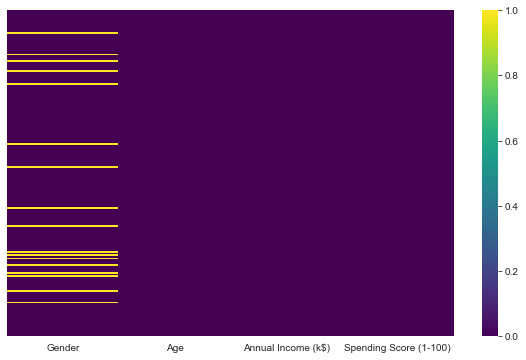

In [74]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [75]:
gender_train = df[df['Gender'].notnull()]
gender_test = df[df['Gender'].isnull()]

In [76]:
gender_train_X = gender_train.drop('Gender', axis=1)
gender_train_Y = gender_train['Gender']

gender_test_X = gender_test.drop('Gender', axis=1)
gender_test_Y = gender_test['Gender']

In [77]:
gender_train_X

,Age,Annual Income (k$),Spending Score (1-100)
0,19.000000,15.0,39.0
1,31.222222,15.0,81.0
2,20.000000,16.0,6.0
3,23.000000,16.0,77.0
4,31.000000,17.0,40.0
...,...,...,...
195,35.000000,120.0,79.0
196,45.000000,126.0,28.0
197,32.000000,126.0,74.0
198,32.000000,137.0,18.0


In [78]:
gender_test_X

,Age,Annual Income (k$),Spending Score (1-100)
14,37.0,20.0,13.000000
27,35.0,28.0,66.833333
31,21.0,30.0,73.000000
37,30.0,34.0,73.000000
45,24.0,39.0,65.000000
82,67.0,54.0,41.000000
96,47.0,60.0,47.000000
121,38.0,67.0,40.000000
132,25.0,72.0,34.000000
148,34.0,78.0,22.000000


In [79]:
scaler = StandardScaler()
gender_train_X = scaler.fit_transform(gender_train_X)
gender_test_X = scaler.transform(gender_test_X)

In [80]:
gender_train_X

array([[-1.43689707, -1.82939129, -0.45494777],
       [-0.56274602, -1.82939129,  1.18185636],
       [-1.36537562, -1.78996847, -1.74100816],
       [-1.15081128, -1.78996847,  1.02597026],
       [-0.57863968, -1.75054565, -0.41597624],
       [-1.22233273,  0.08261559,  0.98699873],
       [-0.29255388, -1.71112283, -1.74100816],
       [-1.15081128, -1.71112283,  1.68848621],
       [ 1.78156816, -1.6717    , -1.85792274],
       [-0.65016113,  0.06290418,  0.83111262],
       [ 1.99613251,  0.04319276, -1.42923594],
       [-0.56274602, -1.6717    ,  1.88334385],
       [ 1.35243946, -1.63227718, -1.39026441],
       [-1.07928983, -1.63227718,  1.02597026],
       [-1.22233273,  0.08261559,  1.10391331],
       [-0.29255388, -1.59285436, -0.61083387],
       [-1.36537562, -1.59285436,  0.59728346],
       [ 0.03870336, -1.51400872, -0.84466304],
       [-0.29255388, -1.51400872,  1.84437232],
       [-0.29255388, -1.47458589, -0.61083387],
       [-1.00776838, -1.47458589,  0.870

In [81]:
gender_model = DecisionTreeClassifier()
gender_model.fit(gender_train_X, gender_train_Y)

DecisionTreeClassifier()

In [82]:
gender_prediction = gender_model.predict(gender_test_X)

In [83]:
gender_prediction

array(['Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male'], dtype=object)

In [84]:
# sns.barplo

In [85]:
gender_predicted = gender_model.predict(gender_test_X)
count = 0

for i in range(0, len(df)):
    if str(df['Gender'][i]) == 'nan':
        df['Gender'][i] = gender_predicted[count]
        count += 1

<ipython-input-85-a4214213d6da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][i] = gender_predicted[count]


In [86]:
df['Gender'].isnull().sum()

0

In [87]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

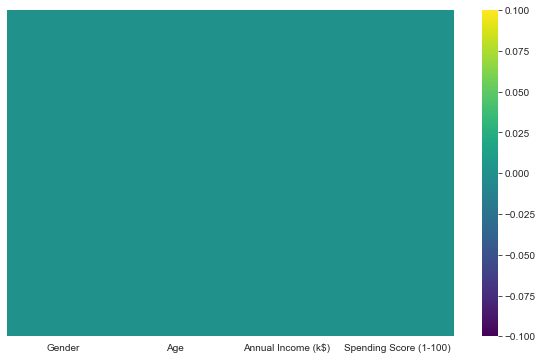

In [88]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [89]:
df['Age'] = df['Age'].astype('int')
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype('int')
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype('int')

# Checking for any outliers

In [90]:
box_plot_data = [df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)']]

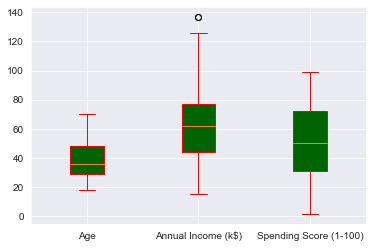

In [91]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'means', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

fig1, ax = plt.subplots()

box_plot(box_plot_data, 'red', 'darkgreen')
ax.set_xticklabels(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

In [92]:
Q1 = df['Annual Income (k$)'].quantile(.25)
Q3 = df['Annual Income (k$)'].quantile(.75)
Q1, Q3

(43.75, 77.25)

In [93]:
IQR = Q3 - Q1
IQR

33.5

In [94]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-6.5, 127.5)

In [95]:
df[(df['Annual Income (k$)'] < lower_limit) | (df['Annual Income (k$)'] > upper_limit)]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


In [96]:
df = df[(df['Annual Income (k$)'] > lower_limit) & (df['Annual Income (k$)'] < upper_limit)]
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,31,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28


In [97]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000
mean,38.904040,60.686869,50.267677
std,13.815532,24.153967,25.987777
min,18.000000,15.000000,1.000000
25%,29.000000,43.250000,31.250000
50%,36.000000,62.000000,50.000000
75%,48.750000,77.000000,72.000000
max,70.000000,126.000000,99.000000


In [98]:
no_outlier_data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

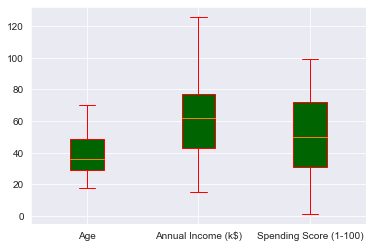

In [99]:
fig1, ax = plt.subplots()

box_plot(no_outlier_data, 'red', 'darkgreen')
ax.set_xticklabels(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

# Data Visualization

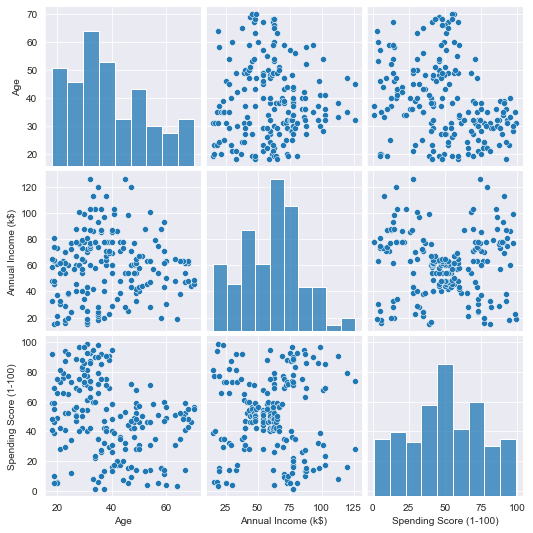

In [100]:
sns.set_style('darkgrid')
sns.pairplot(df)

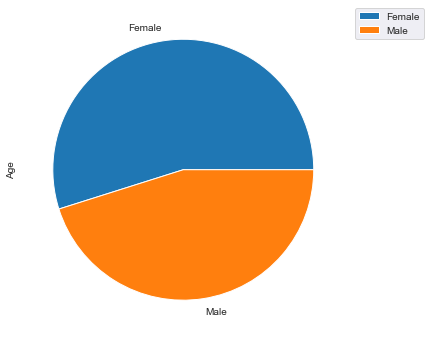

In [101]:
df_data = df.groupby('Gender')['Age'].sum()

fig = plt.figure(figsize=(10, 6))
df_data.plot.pie()
plt.legend(bbox_to_anchor=(1.01, 1.01))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


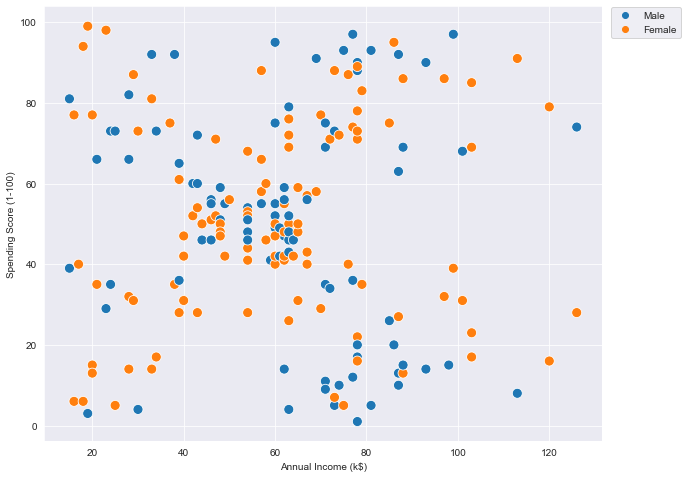

In [102]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Gender'], s=100)

plt.legend(loc='upper right', bbox_to_anchor = (1.15, 1.01))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


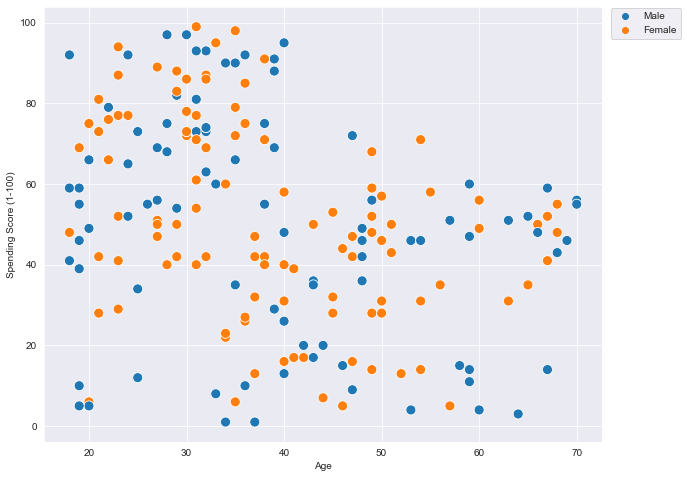

In [103]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue=df['Gender'], s=100)

plt.legend(loc='upper right', bbox_to_anchor = (1.15, 1.01))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


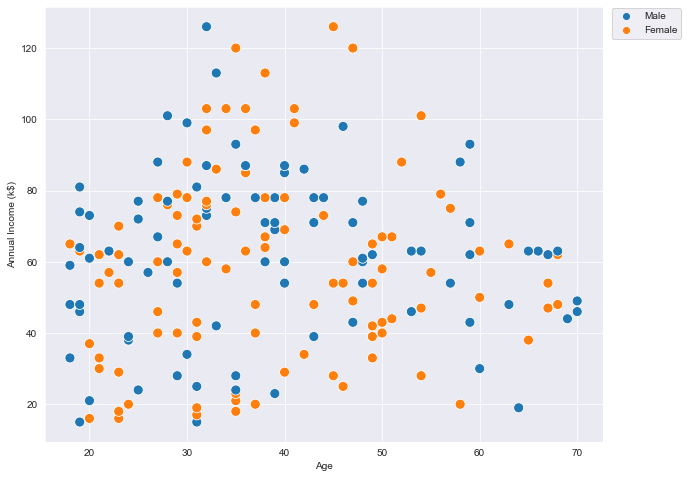

In [104]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(df['Age'], df['Annual Income (k$)'], hue=df['Gender'], s=100)

plt.legend(loc='upper right', bbox_to_anchor = (1.15, 1.01))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Counts')

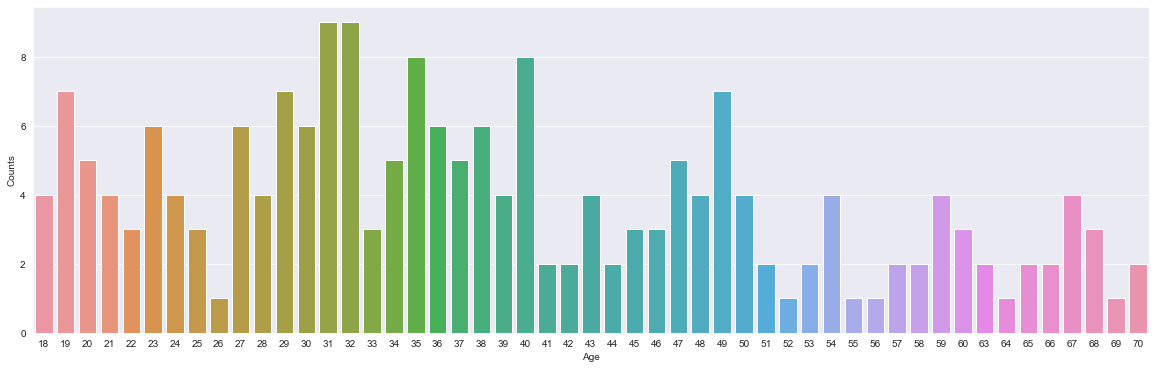

In [105]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(df['Age'].value_counts().index, df['Age'].value_counts().values)

plt.xlabel('Age')
plt.ylabel('Counts')

Text(0, 0.5, 'Value Counts')

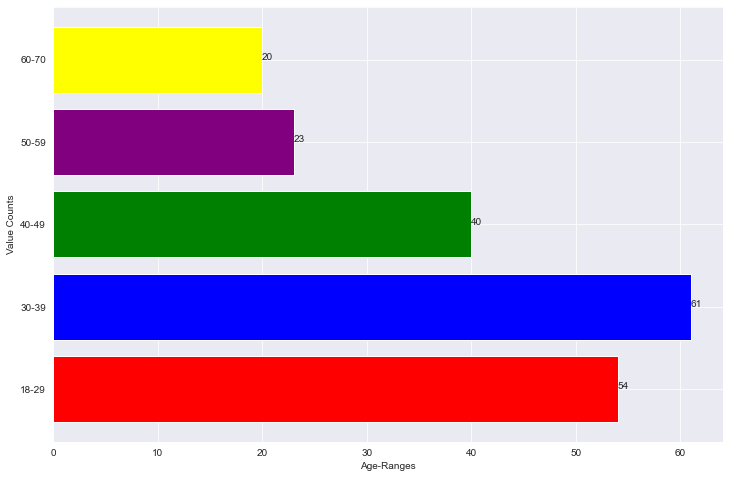

In [106]:
df_18_29 = df['Age'][(df['Age'] >= 18) & (df['Age'] <= 29)]
df_30_39 = df['Age'][(df['Age'] >= 30) & (df['Age'] <= 39)]
df_40_49 = df['Age'][(df['Age'] >= 40) & (df['Age'] <= 49)]
df_50_59 = df['Age'][(df['Age'] >= 50) & (df['Age'] <= 59)]
df_60_70 = df['Age'][(df['Age'] >= 60) & (df['Age'] <= 70)]
X = ['18-29', '30-39', '40-49', '50-59', '60-70']
Y = [len(df_18_29), len(df_30_39), len(df_40_49), len(df_50_59), len(df_60_70)]


fig = plt.figure(figsize=(12, 8))
plt.barh(X, Y, color=['red', 'blue', 'green', 'purple', 'yellow'])


for index, value in enumerate(Y):
    plt.text(value, index, str(value))
    
plt.xlabel('Age-Ranges')
plt.ylabel('Value Counts')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Counts')

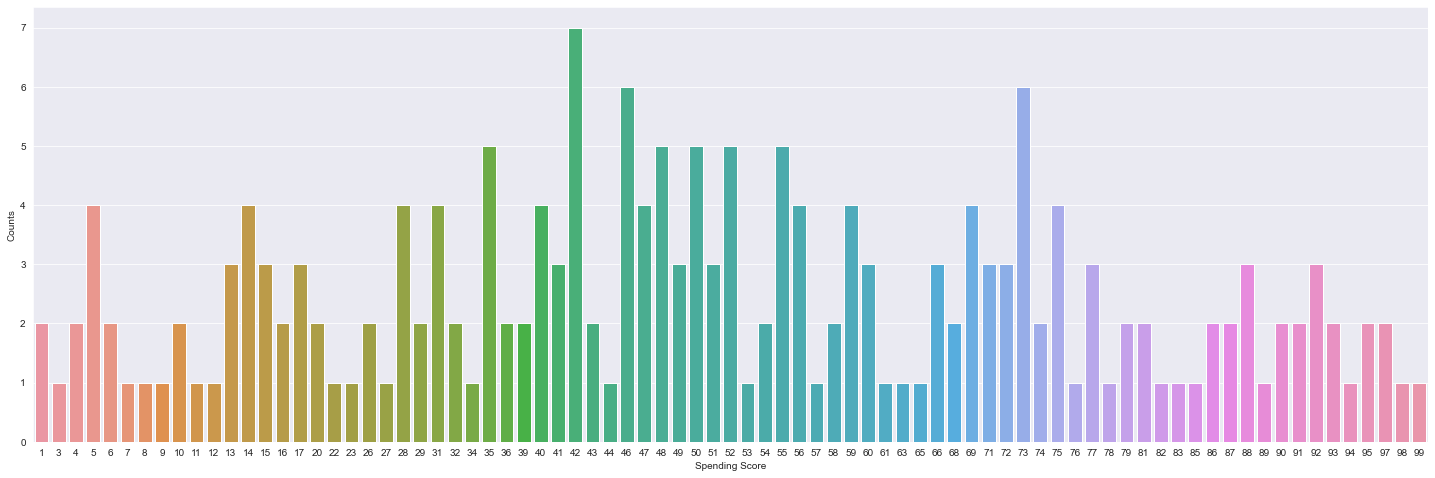

In [107]:
fig = plt.figure(figsize=(25, 8))
sns.barplot(df['Spending Score (1-100)'].value_counts().index, df['Spending Score (1-100)'].value_counts().values)

plt.xlabel('Spending Score')
plt.ylabel('Counts')

Text(0, 0.5, 'Value Counts')

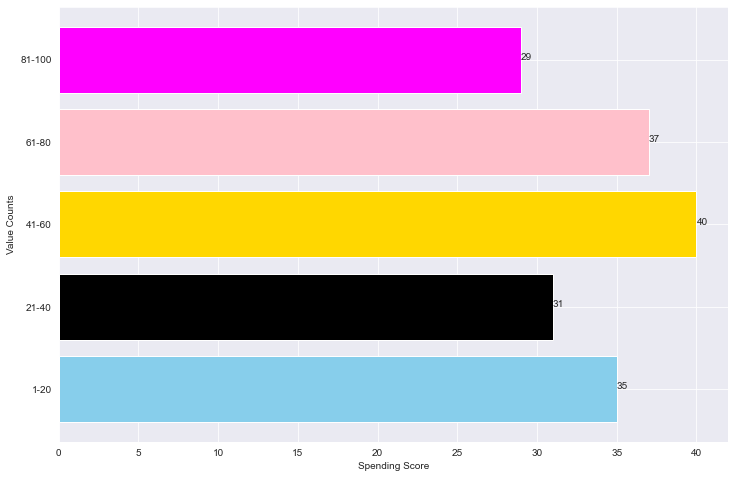

In [108]:
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype('int')
df_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
df_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
df_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
df_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
df_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]
X = ['1-20', '21-40', '41-60', '61-80', '81-100']
Y = [len(df_1_20), len(df_21_40), len(df_40_49), len(df_61_80), len(df_81_100)]


fig = plt.figure(figsize=(12, 8))
plt.barh(X, Y, color=['skyblue', 'black', 'gold', 'pink', 'magenta'])


for index, value in enumerate(Y):
    plt.text(value, index, str(value))

plt.xlabel('Spending Score')
plt.ylabel('Value Counts')



### Alternative technique to find the max range in dataset

(array([20., 14., 30., 20., 45., 37., 13., 13.,  2.,  4.]),
 array([ 15. ,  26.1,  37.2,  48.3,  59.4,  70.5,  81.6,  92.7, 103.8,
        114.9, 126. ]))

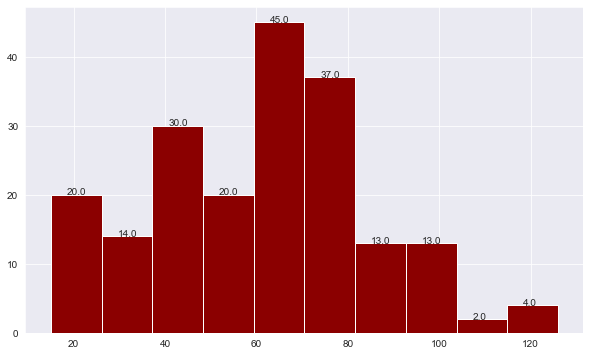

In [109]:
fig = plt.figure(figsize=(10, 6))

counts, bins, _ = plt.hist(df['Annual Income (k$)'], color='darkred')

for c, b in zip(counts, bins):
    plt.gca().text(b + 3.5 , c, str(c))
    
counts, bins

In [110]:
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values
X1

array([[19, 39],
       [31, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [31, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [39, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 66],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [43, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 31],
       [27, 47],
       [29, 42],
       [37, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 28],
       [47, 72],
       [51, 50],
       [69, 46],
       [27, 51

#  Creating Clustering Model

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[170647.98989898973, 74169.0689223058, 46157.829666492034, 30554.89561295869, 25122.398754438378, 20827.449988947825, 17135.48086556624, 14284.052463092465, 12810.751397937809, 11260.623342182702]


Text(0.5, 0, 'Value of K')

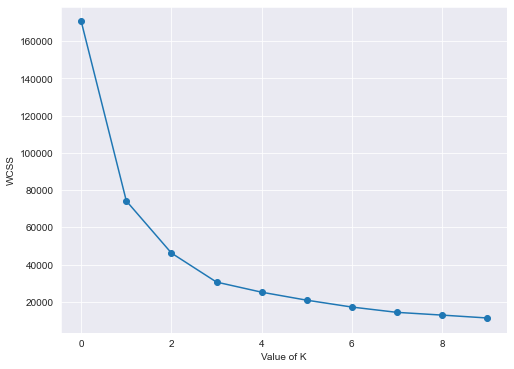

In [111]:
fig = plt.figure(figsize=(8, 6))

Select_Cluster_X1 = []
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values
X1

for i in range(1, 11):
    k_model_1 = KMeans(n_clusters=i)
    k_model_1.fit(X1)
    Select_Cluster_X1.append(k_model_1.inertia_)
    

print(Select_Cluster_X1)
plt.plot(Select_Cluster_X1, marker='o')
plt.ylabel('WCSS')
plt.xlabel('Value of K')

### from the plot we can deduct that value for k would be 4.

In [112]:
k_model_1 = KMeans(n_clusters=4, random_state=101)
y_pred_X1 = k_model_1.fit_predict(X1)
cluster_centroids_X1 = k_model_1.cluster_centers_ 

df['X1_pred'] = y_pred_X1
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),X1_pred
0,Male,19,15,39,0
1,Male,31,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,0
...,...,...,...,...,...
193,Female,38,113,91,3
194,Female,47,120,16,1
195,Female,35,120,79,3
196,Female,45,126,28,1


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


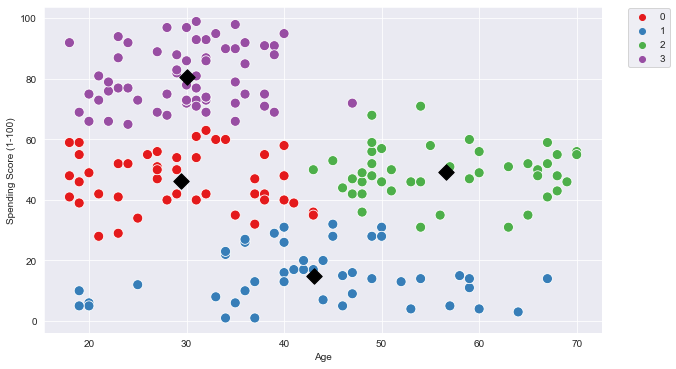

In [113]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue=df['X1_pred'], palette='Set1', s=100)
plt.scatter(cluster_centroids_X1[:, 0], cluster_centroids_X1[:, 1], color='black', marker='D', s=120)

plt.legend(loc='upper right', bbox_to_anchor = (1.13, 1.01))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[247979.398989899, 158404.9090909092, 100587.4223602484, 70597.88523147332, 45408.0793377568, 38363.68765702135, 32460.99767606231, 26987.313290802747, 23697.007021899666, 21373.088985088976, 18897.77896175461, 17242.76422327672, 15880.994789055974, 14672.912082824583]


Text(0.5, 0, 'Value of K')

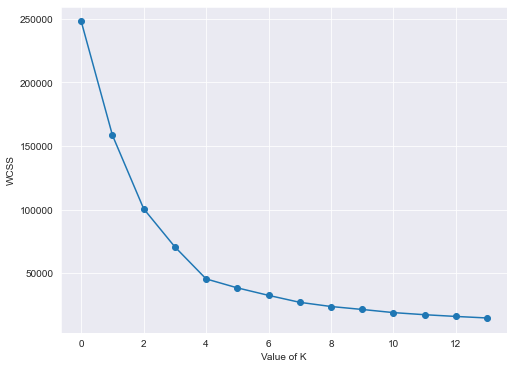

In [114]:
fig = plt.figure(figsize=(8, 6))
X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
Select_Cluster_X2 = []

for i in range(1, 15):
    k_model_2 = KMeans(n_clusters=i)
    k_model_2.fit(X2)
    Select_Cluster_X2.append(k_model_2.inertia_)
    
print(Select_Cluster_X2)
plt.plot(Select_Cluster_X2, marker='o')
plt.ylabel('WCSS')
plt.xlabel('Value of K')

### We can infer from the plot that value of k=5 would be much effective for 'Annul Income' and 'Spending Score'.

In [115]:
k_model_2 = KMeans(n_clusters=5, random_state=101)
y_pred_X2 = k_model_2.fit_predict(X2)
cluster_centroids_X2 = k_model_2.cluster_centers_

df['X2_pred'] = y_pred_X2
cluster_centroids_X2

array([[56.03947368, 49.84210526],
       [84.47368421, 17.52631579],
       [27.22727273, 22.54545455],
       [81.65853659, 81.36585366],
       [28.57142857, 79.38095238]])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


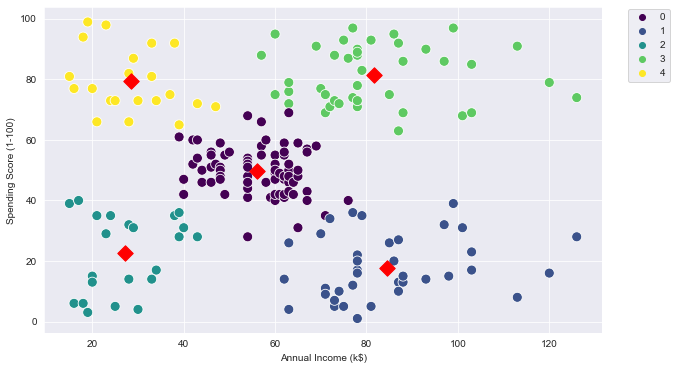

In [116]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['X2_pred'], palette='viridis', s=100)
plt.scatter(cluster_centroids_X2[:, 0], cluster_centroids_X2[:, 1], color='red', marker='D', s=120)

plt.legend(loc='upper right', bbox_to_anchor = (1.13, 1.01))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[285580.57575757575, 189007.03426079734, 135422.0652545999, 101228.4456720765, 75640.16423431641, 59997.6241353218, 52999.43584083057, 47130.1094205704, 43822.44124604913, 40342.94938668787, 37016.86771885525, 34653.96100337572, 31851.620923666986, 30766.82193118772]


Text(0.5, 0, 'Value of K')

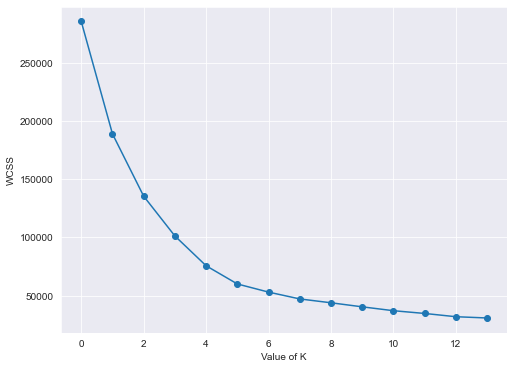

In [117]:
fig = plt.figure(figsize=(8, 6))
X3 = df.loc[:, ['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values

Select_Cluster_X3 = []

for i in range(1, 15):
    k_model_3 = KMeans(n_clusters=i)
    k_model_3.fit(X3)
    Select_Cluster_X3.append(k_model_3.inertia_)

cluster_centroids = k_model_3.cluster_centers_
    
print(Select_Cluster_X3)
plt.plot(Select_Cluster_X3, marker='o')
plt.ylabel('WCSS')
plt.xlabel('Value of K')

### We can conclude from the plot that k=5 would be much useful to select.

In [118]:
k_model_3 = KMeans(n_clusters=5)
y_pred_X3 = k_model_3.fit_predict(X3)

df['X3_pred'] = y_pred_X3
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),X1_pred,X2_pred,X3_pred
0,Male,19,15,39,0,2,3
1,Male,31,15,81,3,4,4
2,Female,20,16,6,1,2,3
3,Female,23,16,77,3,4,4
4,Female,31,17,40,0,2,3
...,...,...,...,...,...,...,...
193,Female,38,113,91,3,3,2
194,Female,47,120,16,1,1,0
195,Female,35,120,79,3,3,2
196,Female,45,126,28,1,1,0


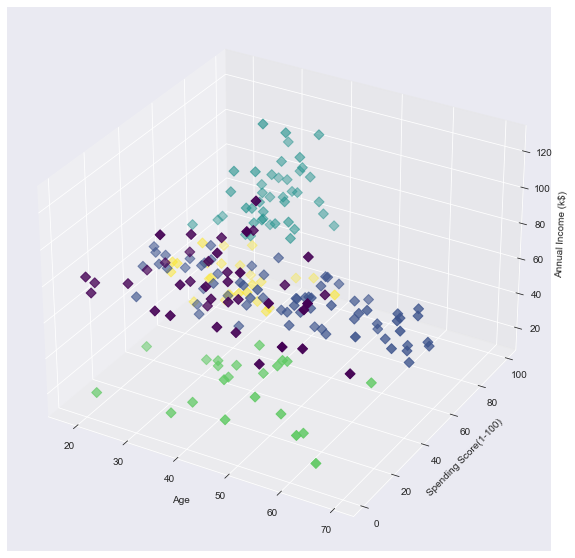

In [119]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

x = df['Age']
z = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

ax.scatter3D(x,y,z, marker="D", c=df["X3_pred"], s=50, cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score(1-100)')
ax.set_zlabel('Annual Income (k$)')


plt.show()

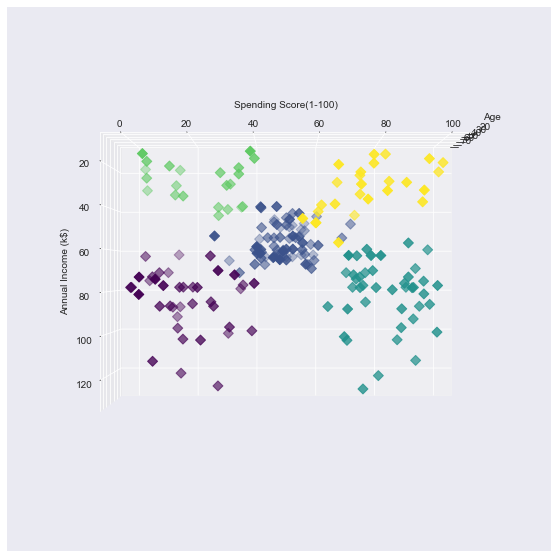

In [120]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

x = df['Age']
z = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

ax.scatter3D(x,y,z, marker="D", c=df["X3_pred"], s=50, cmap='viridis')
ax.view_init(180, 0)

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score(1-100)')
ax.set_zlabel('Annual Income (k$)')

plt.show()

In [121]:
from sklearn.metrics import silhouette_score

In [122]:
score_3 = silhouette_score(X3, k_model_3.labels_, metric='euclidean')
score_3

0.4040503264550493

In [123]:
score_2 = silhouette_score(X2, k_model_2.labels_, metric='euclidean')
score_2

0.5050723356618962

In [124]:
score_1 = silhouette_score(X1, k_model_1.labels_, metric='euclidean')
score_1

0.47065465719135496